In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
weather = pd.read_csv("weather.csv")

In [4]:
weather.head(13)

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,aberporth
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,aberporth
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,aberporth
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,aberporth
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,aberporth


In [5]:
weather = weather[weather['month'] == 12]
weather

Text(0.5, 1.0, 'Max vs Min Temperature in the UK')

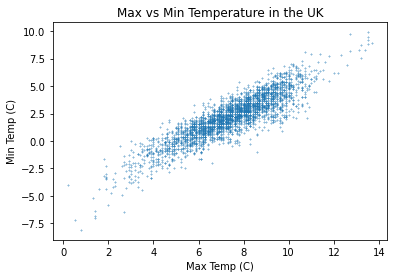

In [7]:
plt.scatter(weather['tmax'], weather['tmin'], marker='x', s=1, alpha=0.5)
plt.xlabel('Max Temp (C)')
plt.ylabel('Min Temp (C)')
plt.title('Max vs Min Temperature in the UK')

In [11]:
top5 = weather['station'].value_counts().head().index
wtop = weather[weather['station'].isin(top5)]
wtop

,year,month,tmax,tmin,af,rain,sun,station
965,1853.0,12.0,NaN,NaN,NaN,39.1,NaN,armagh
977,1854.0,12.0,NaN,NaN,NaN,107.2,NaN,armagh
989,1855.0,12.0,NaN,NaN,NaN,54.3,NaN,armagh
1001,1856.0,12.0,NaN,NaN,NaN,90.5,NaN,armagh
1013,1857.0,12.0,NaN,NaN,NaN,42.7,NaN,armagh
...,...,...,...,...,...,...,...,...
31265,2015.0,12.0,9.2,3.7,1.0,268.4,21.1,stornoway
31277,2016.0,12.0,10.1,5.1,2.0,111.8,23.8,stornoway
31289,2017.0,12.0,7.4,2.3,8.0,138.2,16.7,stornoway
31301,2018.0,12.0,8.8,4.1,2.0,130.2,22.2,stornoway


Text(0.5, 1.0, 'Average Monthly Rainfall')

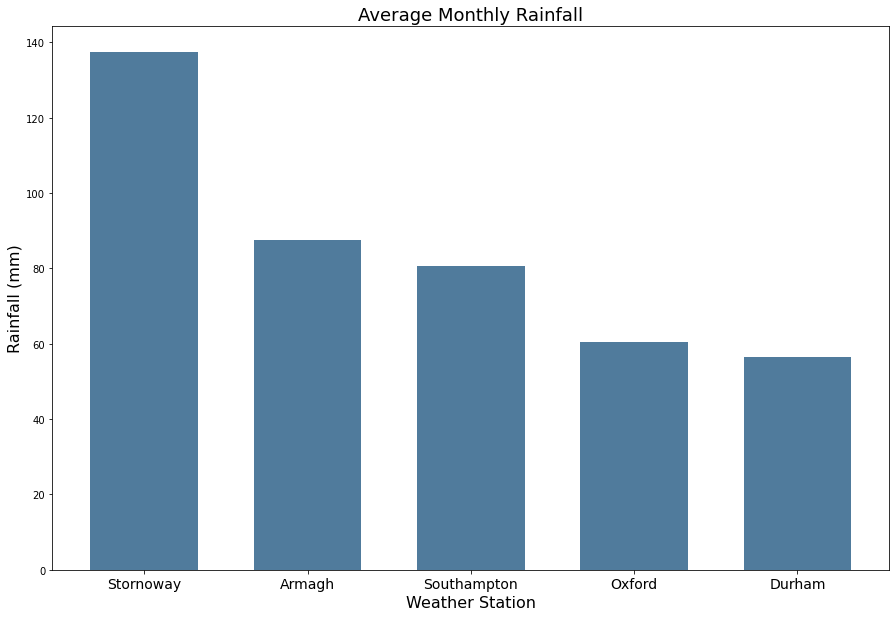

In [18]:
avg_rain = wtop.groupby('station').mean()['rain'].sort_values(ascending=False)
avg_rain
plt.figure(figsize=(15,10))
plt.bar(avg_rain.index, avg_rain, color='xkcd:stormy blue', width=0.66)
plt.xticks([0,1,2,3,4], ["Stornoway", "Armagh", "Southampton", "Oxford", "Durham"], size=14, rotation=0)
plt.xlabel('Weather Station', size=16)
plt.ylabel('Rainfall (mm)', size=16)
plt.title("Average Monthly Rainfall", size=18)

Text(0.5, 0.98, 'December Weather History')

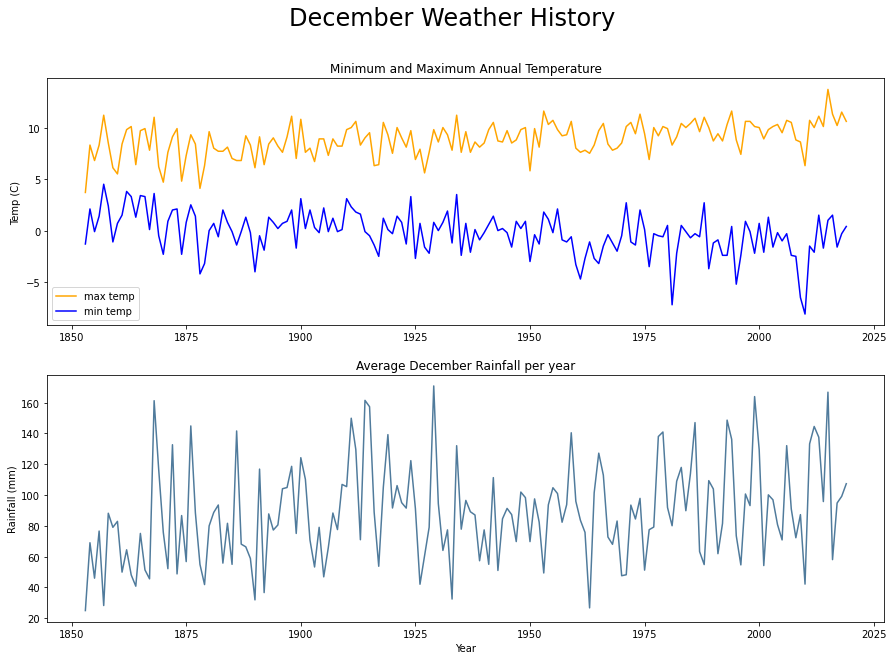

In [25]:
annual = weather.groupby('year')
plt.figure(figsize=(15,10))
plt.subplot(211)
# This means the table is 2 by 1 (21) for the first subplot (1)
plt.plot(annual.max()['tmax'], color='orange', label="max temp")
plt.plot(annual.min()['tmin'], color='blue', label="min temp")
plt.ylabel('Temp (C)')
plt.title('Minimum and Maximum Annual Temperature')
plt.legend()

plt.subplot(212)
plt.plot(annual.mean()['rain'], color="xkcd:stormy blue")
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')
plt.title('Average December Rainfall per year')
plt.suptitle('December Weather History', size=24)

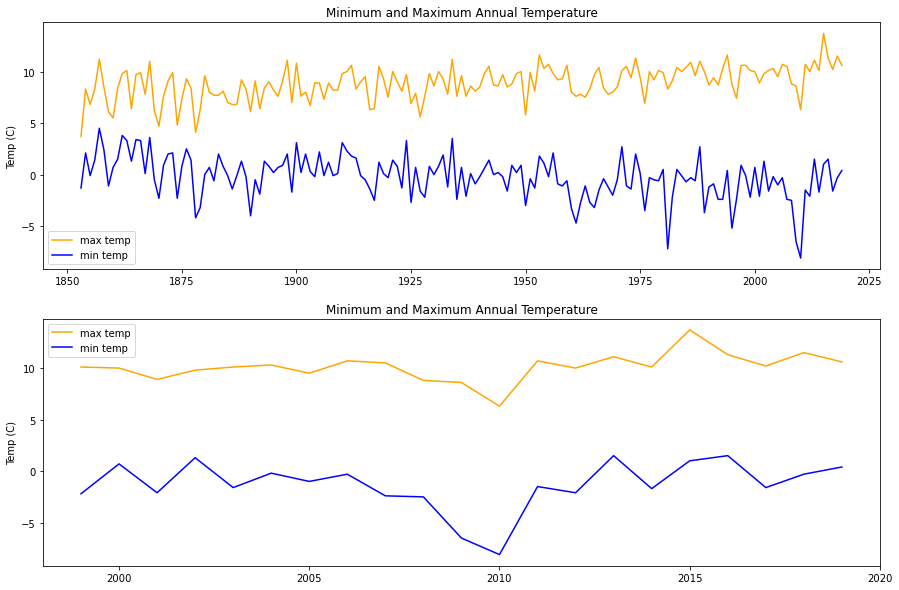

In [27]:
recent20 = weather[weather['year'] >= weather['year'].max() - 20].groupby('year')

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(annual.max()['tmax'], color='orange', label="max temp")
plt.plot(annual.min()['tmin'], color='blue', label="min temp")
plt.ylabel('Temp (C)')
plt.title('Minimum and Maximum Annual Temperature')
plt.legend()

plt.subplot(212)
plt.plot(recent20.max()['tmax'], color='orange', label="max temp")
plt.plot(recent20.min()['tmin'], color='blue', label="min temp")
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.ylabel('Temp (C)')
plt.title('Minimum and Maximum Annual Temperature')
plt.legend()

In [28]:
type(recent20)

pandas.core.groupby.generic.DataFrameGroupBy

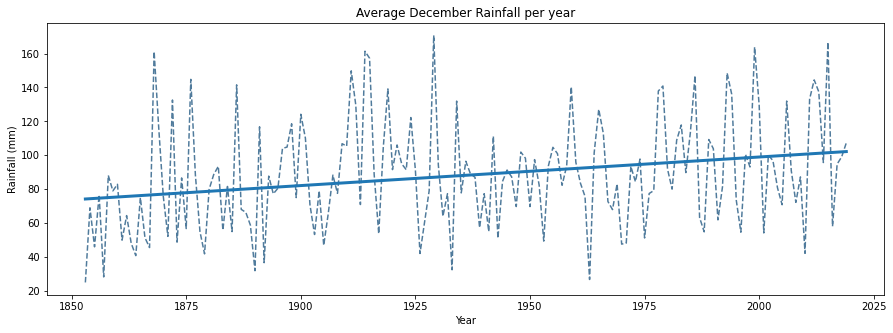

In [29]:
rain = annual.mean()['rain']
years = annual.mean().index

plt.figure(figsize=(15, 5))
plt.plot(rain, color='xkcd:stormy blue', ls='--')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')
plt.title('Average December Rainfall per year')

slope, intercept = np.polyfit(years, rain, 1)
plt.plot(years, years*slope + intercept, linewidth=3)

Text(0, 0.5, 'Sunshine (min)')

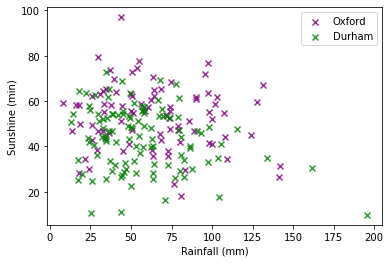

In [31]:
oxford = weather[weather['station']=='oxford']
durham = weather[weather['station']=='durham']
plt.scatter(oxford['rain'], oxford['sun'], color='purple', marker='x', label='Oxford', alpha=0.8)
plt.scatter(durham['rain'], durham['sun'], color='green', marker='x', label='Durham', alpha=0.8)
plt.legend()
plt.xlabel('Rainfall (mm)')
plt.ylabel('Sunshine (min)')

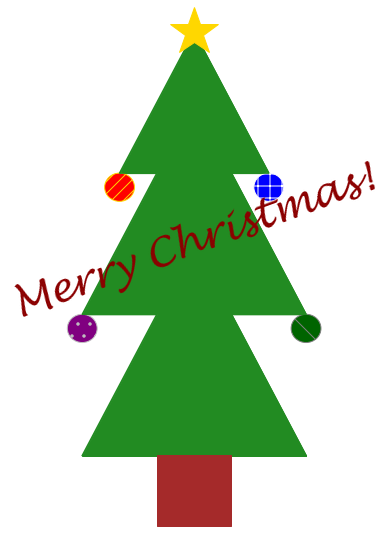

In [40]:
tree = [[0, 1, 0, 1, 0.5, 1.5, 2.5, 2, 3, 2, 3], [0, 2, 2, 4, 4, 6, 4, 4, 2, 2, 0]]
plt.figure(figsize=(5, 10))
plt.plot(tree[0], tree[1], color='forestgreen')
plt.fill_between(tree[0], tree[1], color='forestgreen')
c1 = plt.Circle((0.5, 3.8), 0.2, facecolor = 'red', edgecolor = 'gold', hatch='//')
c2 = plt.Circle((2.5, 3.8), 0.2, facecolor = 'blue', edgecolor = 'white', hatch='+')
c3 = plt.Circle((0, 1.8), 0.2, facecolor = 'purple', edgecolor = 'silver', hatch='.')
c4 = plt.Circle((3, 1.8), 0.2, facecolor = 'darkgreen', edgecolor = 'grey', hatch='\\')
s1 = plt.Rectangle((1, -1), 1, 1, color= 'brown')
plt.gca().add_patch(c1)
plt.gca().add_patch(c2)
plt.gca().add_patch(c3)
plt.gca().add_patch(c4)
plt.gca().add_patch(s1)

plt.plot(1.5, 6, marker="*", markersize=50, color='gold')
plt.text(1.5, 3, "Merry Christmas!", font = 'Lucida Handwriting', ha='center', va='center', 
         size=40, rotation=20, color='darkred')
plt.axis('off')
plt.savefig('ChristmasTreeDesign.png')
